<a href="https://colab.research.google.com/github/KirZa-alt/Wild-Blueberry-Yield-Prediction-using-Machine-Learning/blob/main/Wild_Blueberry_Yield_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

data=pd.DataFrame(pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv"))

data.head()

# --- Column Descriptions ---
# clone_size → Size of plant area
# honeybees → No. of honey bee visits
# bumbles → Bumble bee visits
# andrena → Andrena bee visits
# osmia → Osmia bee visits
# max_of_upper_range → Highest upper value
# min_of_upper_range → Lowest upper value
# average_of_upper_range → Avg upper range
# max_of_lower_range → Highest lower value
# min_of_lower_range → Lowest lower value
# average_of_lower_range → Avg lower range
# raining_days → Total rain days
# average_raining_days → Avg rain days
# fruit_set → % flowers to fruits
# fruit_mass → Avg fruit weight
# seeds → Avg seeds per fruit
# yield → Target (final production)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [7]:
# Dataset Information
print("data info:\n",data.info())
print("\ndata description:\n",data.describe())
print("\ndata rows and columns:\n",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [8]:
# Checking null values and dublicates
print("Checking null values:\n",data.isnull().sum())
print("\nChecking dublicates:\n",data.duplicated().sum())

# No need of data cleaning
print(data.columns)

Checking null values:
 Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

Checking dublicates:
 0
Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')


In [9]:
# Data Analysis - Correlation Check
# Checking how each feature is related (correlated) with 'yield'

correlation = data.corr()

# Each print shows how strongly the feature affects yield.
# Closer to +1 = strong positive relation
# Closer to -1 = strong negative relation
# Near 0 = no relation

print("Correlation between clonesize and yield:\n", correlation.loc["clonesize", "yield"])
print("Correlation between honeybee	 and yield:\n", correlation.loc["honeybee", "yield"])
print("Correlation between bumbles and yield:\n", correlation.loc["bumbles", "yield"])
print("Correlation between andrena and yield:\n", correlation.loc["andrena", "yield"])
print("Correlation between osmia and yield:\n", correlation.loc["osmia", "yield"])
print("Correlation between MaxOfUpperTRange and yield:\n", correlation.loc["MaxOfUpperTRange", "yield"])
print("Correlation between MinOfLowerTRange and yield:\n", correlation.loc["MinOfLowerTRange", "yield"])
print("Correlation between AverageOfUpperTRange and yield:\n", correlation.loc["AverageOfUpperTRange", "yield"])
print("Correlation between MaxOfLowerTRange and yield:\n", correlation.loc["MaxOfLowerTRange", "yield"])
print("Correlation between MinOfLowerTRange and yield:\n", correlation.loc["MinOfLowerTRange", "yield"])
print("Correlation between AverageOfLowerTRange and yield:\n", correlation.loc["AverageOfLowerTRange", "yield"])
print("Correlation between RainingDays and yield:\n", correlation.loc["RainingDays", "yield"])
print("Correlation between AverageRainingDays and yield:\n", correlation.loc["AverageRainingDays", "yield"])
print("Correlation between fruitset and yield:\n", correlation.loc["fruitset", "yield"])
print("Correlation between fruitmass and yield:\n", correlation.loc["fruitmass", "yield"])
print("Correlation between seeds and yield:\n", correlation.loc["seeds", "yield"])

Correlation between clonesize and yield:
 -0.5167366551050447
Correlation between honeybee	 and yield:
 -0.044249750832731166
Correlation between bumbles and yield:
 0.3094071165356456
Correlation between andrena and yield:
 0.14027727653765504
Correlation between osmia and yield:
 0.3808917829037247
Correlation between MaxOfUpperTRange and yield:
 -0.18707538475083332
Correlation between MinOfLowerTRange and yield:
 -0.18333912486285248
Correlation between AverageOfUpperTRange and yield:
 -0.18177390904835133
Correlation between MaxOfLowerTRange and yield:
 -0.1874394405142288
Correlation between MinOfLowerTRange and yield:
 -0.18333912486285248
Correlation between AverageOfLowerTRange and yield:
 -0.1812929491738864
Correlation between RainingDays and yield:
 -0.540068535676956
Correlation between AverageRainingDays and yield:
 -0.541214929179562
Correlation between fruitset and yield:
 0.9840811732284985
Correlation between fruitmass and yield:
 0.930364950072852
Correlation between

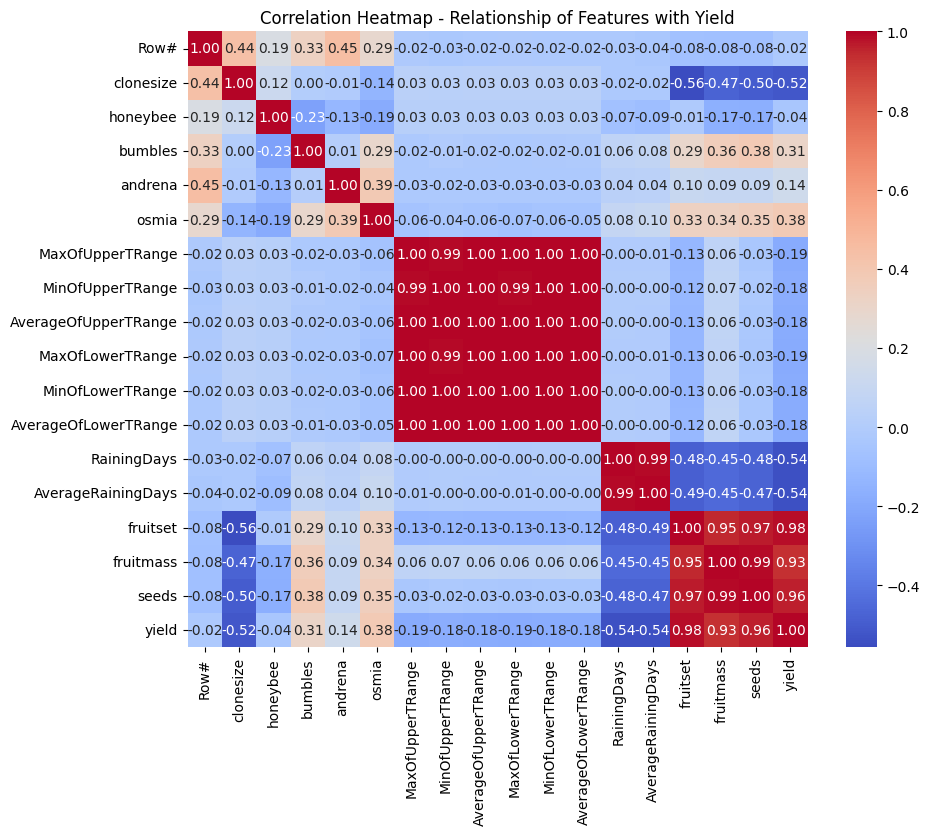

yield                   1.000000
fruitset                0.984081
seeds                   0.961249
fruitmass               0.930365
osmia                   0.380892
bumbles                 0.309407
andrena                 0.140277
Row#                   -0.024942
honeybee               -0.044250
MinOfUpperTRange       -0.175883
AverageOfLowerTRange   -0.181293
AverageOfUpperTRange   -0.181774
MinOfLowerTRange       -0.183339
MaxOfUpperTRange       -0.187075
MaxOfLowerTRange       -0.187439
clonesize              -0.516737
RainingDays            -0.540069
AverageRainingDays     -0.541215
Name: yield, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data.corr()

# 🎨 Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Relationship of Features with Yield")
plt.show()

# which input effects most
print(correlation["yield"].sort_values(ascending=False))


In [28]:
from sklearn.model_selection import train_test_split

X=data.drop("yield", axis=1)
y=data["yield"]

X_train, X_test, y_train, y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (621, 17)
Testing data shape: (156, 17)


Using Linear Regression Model:

R² Score: 0.9908320214651779
Root Mean Square Error (RMSE): 133.4883409345018

Using Random Forest Regressor Model:

R² Score: 0.9878690879447829
Root Mean Square Error (RMSE): 153.55121904972282

Using Decision Tree Regressor Model:

R² Score: 0.9776879261253756
Root Mean Square Error (RMSE): 208.2459246871451

Among all models, Linear Regression gave the best accuracy (R² = 0.99)
and the lowest error (RMSE = 133),
making it the most reliable for yield prediction.



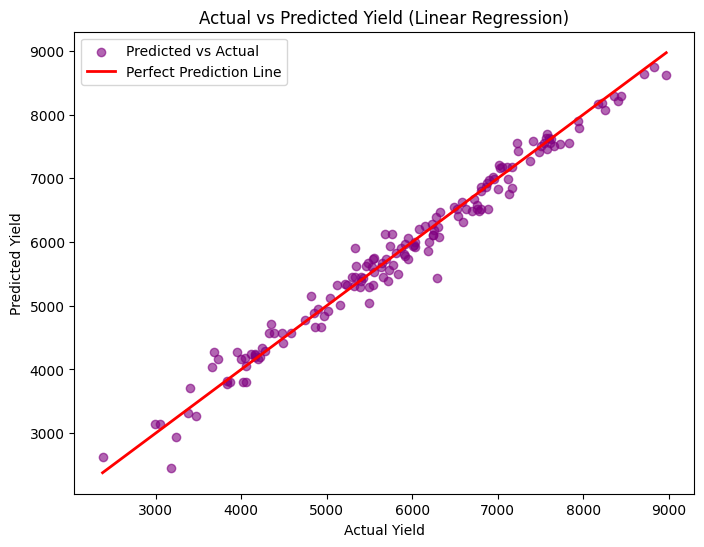

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression
model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
print("Using Linear Regression Model:\n")

r2=r2_score(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Root Mean Square Error (RMSE):", rmse)

# Random Forest Regressor

model=RandomForestRegressor()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print("\nUsing Random Forest Regressor Model:\n")
r2=r2_score(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Root Mean Square Error (RMSE):", rmse)

# Decision Tree Regressor

model=DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print("\nUsing Decision Tree Regressor Model:\n")
r2=r2_score(y_test,y_pred)

rmse=np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Root Mean Square Error (RMSE):", rmse)

print("\nAmong all models, Linear Regression gave the best accuracy (R² = 0.99)\nand the lowest error (RMSE = 133),\nmaking it the most reliable for yield prediction.\n")
# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Perfect Prediction Line")

plt.title("Actual vs Predicted Yield (Linear Regression)")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.legend()
plt.show()


In [46]:
# 🧩 Step 7: Conclusion

# After analyzing the Wild Blueberry dataset, I found that the features
# fruitmass, seeds, and fruitset had the strongest positive effect on yield.
# Pollination factors like honeybees and bumbles also improved yield performance.
# Among all models, Linear Regression performed best with R² = 0.99 and RMSE = 133.48.
# This shows that machine learning can accurately predict blueberry yield.